In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
from scripts.ellipse import CosmoFisher
from scripts.plot_contour import plot_ellipse
rc('text', usetex=True)
rc('font', family='serif')
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

## Steps:

### 1. Update cosmological parameter values

In [2]:
# dictionary of cosmological parameters (add or remove rows as needed)
cosmo_params = {
        'Om': {'value': 0.26, 'label': '$\Omega_m$'},
        's8': {'value': 0.84, 'label': '$\sigma_8$'},
        'w0': {'value': -1, 'label': '$w_0$'},
        'ns': {'value': 0.9649, 'label': '$n_s$'},
        'Ob': {'value': 0.0493, 'label': '$\Omega_b$'},
        'H0': {'value': 67.3, 'label': '$H_0$'},
        'S8': {'value': 0.78, 'label': '$S_8$'}
        }

### 2. Add Fisher Matrices 

In [6]:
# sample N x N Fisher matrices for N parameters for each configuration/method (replace with your own)

fisher_matrix_1 = [
    [100, 50, 30, 20, 10, 10],
    [50, 100, 40, 30, 20, 20],
    [30, 40, 100, 50, 30, 30],
    [20, 30, 50, 100, 40, 40],
    [10, 20, 30, 40, 100, 50],
    [10, 20, 30, 40, 50, 100]
]

# Fisher Matrix Method 2
fisher_matrix_2 = [
    [150, 90, 70, 60, 50, 50],
    [90, 150, 80, 70, 60, 60],
    [70, 80, 150, 90, 70, 70],
    [60, 70, 90, 150, 80, 80],
    [50, 60, 70, 80, 160, 100],
    [50, 60, 70, 80, 100, 150]
]


# update values and labels and add rows as needed
fisher_dict = {
    'f1': {'value': fisher_matrix_1, 'label': 'Method 1'},
    'f2': {'value': fisher_matrix_2, 'label': 'Method 2'}
}

fisher_matrices = list(fisher_dict.keys())

### 3. Customise contour colours

In [7]:
recon_colors = [
    [0.0, 0.302, 0.698],  # Medium Blue
    [0.282, 0.82, 0.8],  # Teal
    [1.0, 0.647, 0],  # Orange
    [0.118, 0.565, 1.0],  # Blue
    [1.0, 0.41, 0.71],  # Pink
    [0.4, 0.8, 0.2],  # Green
    [0.729, 0.333, 0.827], # Purple
    ]

### 4. Plot contours for a given pair of cosmological parameters

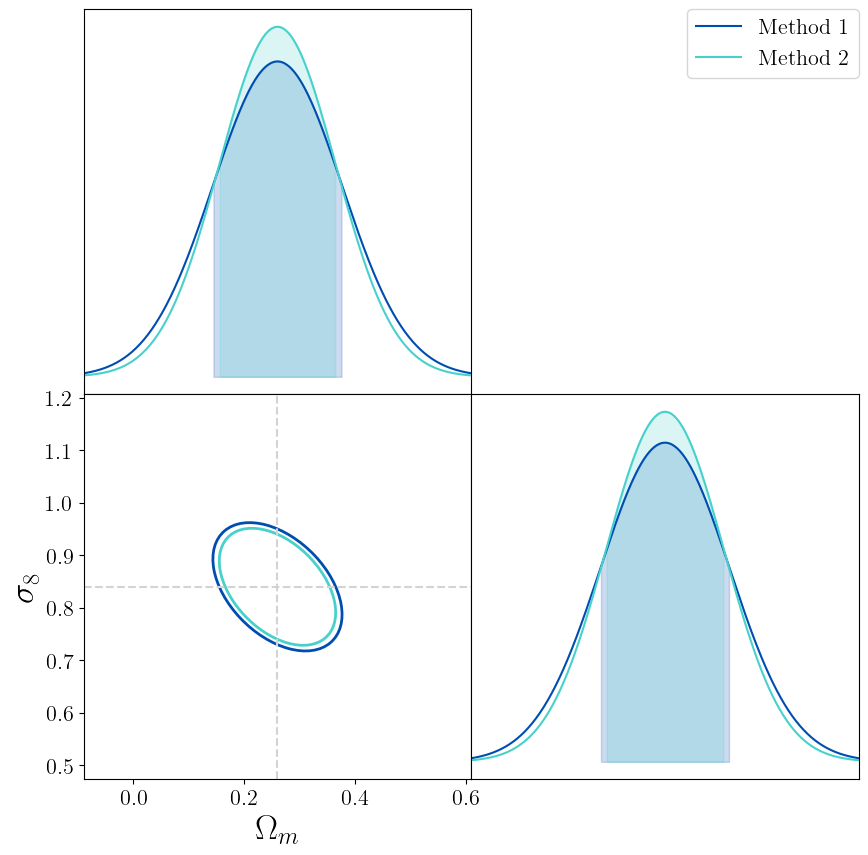

In [8]:
p1 = 'Om'
p2 = 's8'

for index, f in enumerate(fisher_matrices):
    fisher_matrix = fisher_dict[f]['value']
    if index==0:
        axs = plot_ellipse(p1, p2, fisher_matrix, cosmo_params, color=recon_colors[index], label=fisher_dict[f]['label'])
    else:
        plot_ellipse(p1, p2, fisher_matrix, cosmo_params, axs=axs, color=recon_colors[index], label=fisher_dict[f]['label'])